In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import seaborn as sns

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.9/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [4]:
(X_train_full,y_train_full),(X_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [5]:
X_train_full

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
X_train_full.shape

(60000, 28, 28)

In [7]:
X_train_full[5000]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

<function matplotlib.pyplot.show(close=None, block=None)>

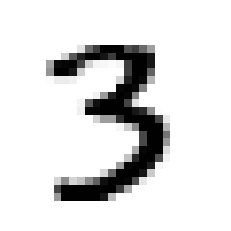

In [8]:
plt.imshow(X_train_full[10000],cmap='binary')
plt.axis("off")
plt.show

<AxesSubplot:>

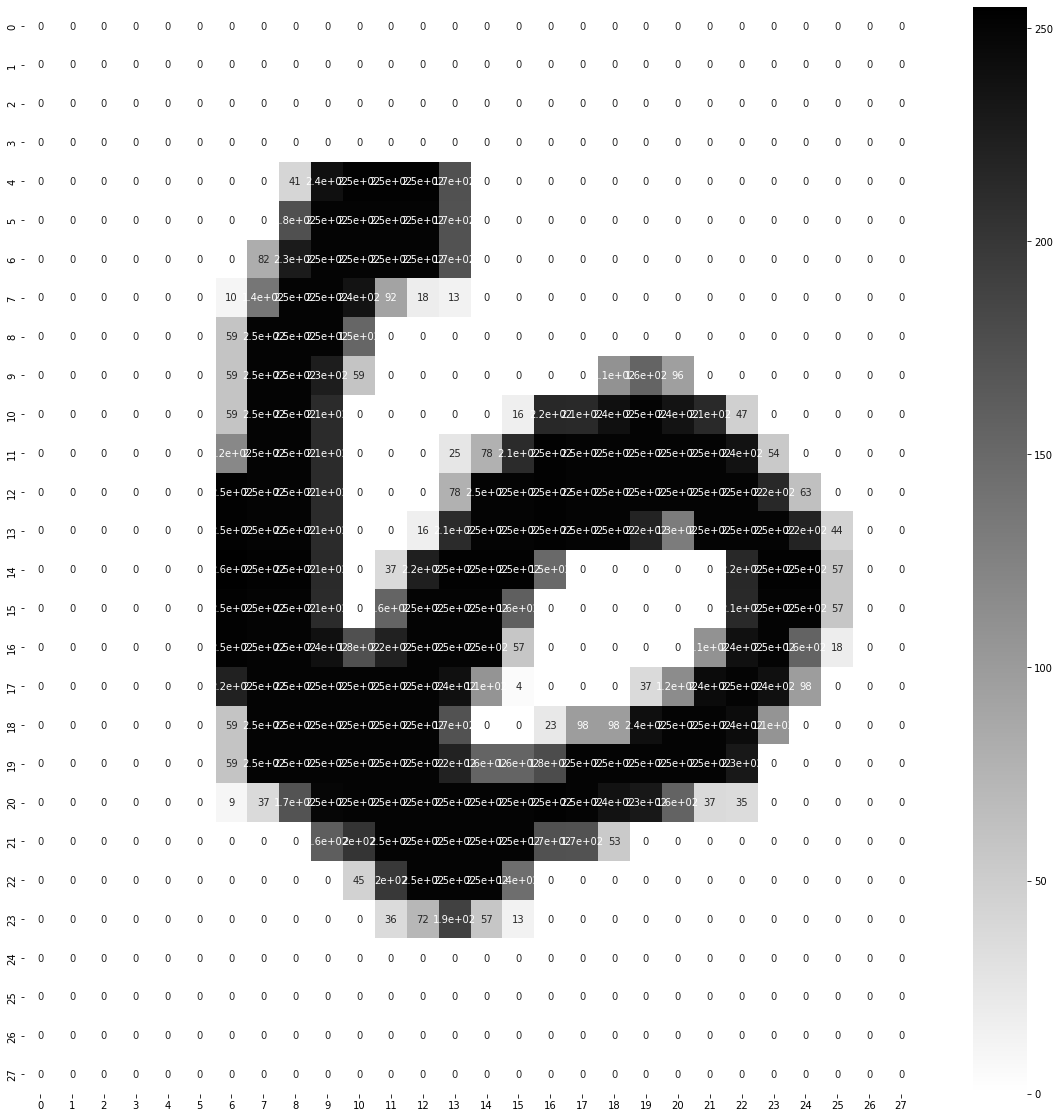

In [9]:
plt.figure(figsize=(20,20))
sns.heatmap(X_train_full[9000],annot=True,cmap='binary')

In [10]:
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
X_valid ,X_train = X_train_full[:5000]/255.,X_train_full[5000:]/255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [11]:
# scale the test set as well
X_test = X_test/255.

In [12]:
print(X_valid.shape)
print(X_train.shape)
print(y_valid.shape)
print(y_train.shape)

(5000, 28, 28)
(55000, 28, 28)
(5000,)
(55000,)


<AxesSubplot:>

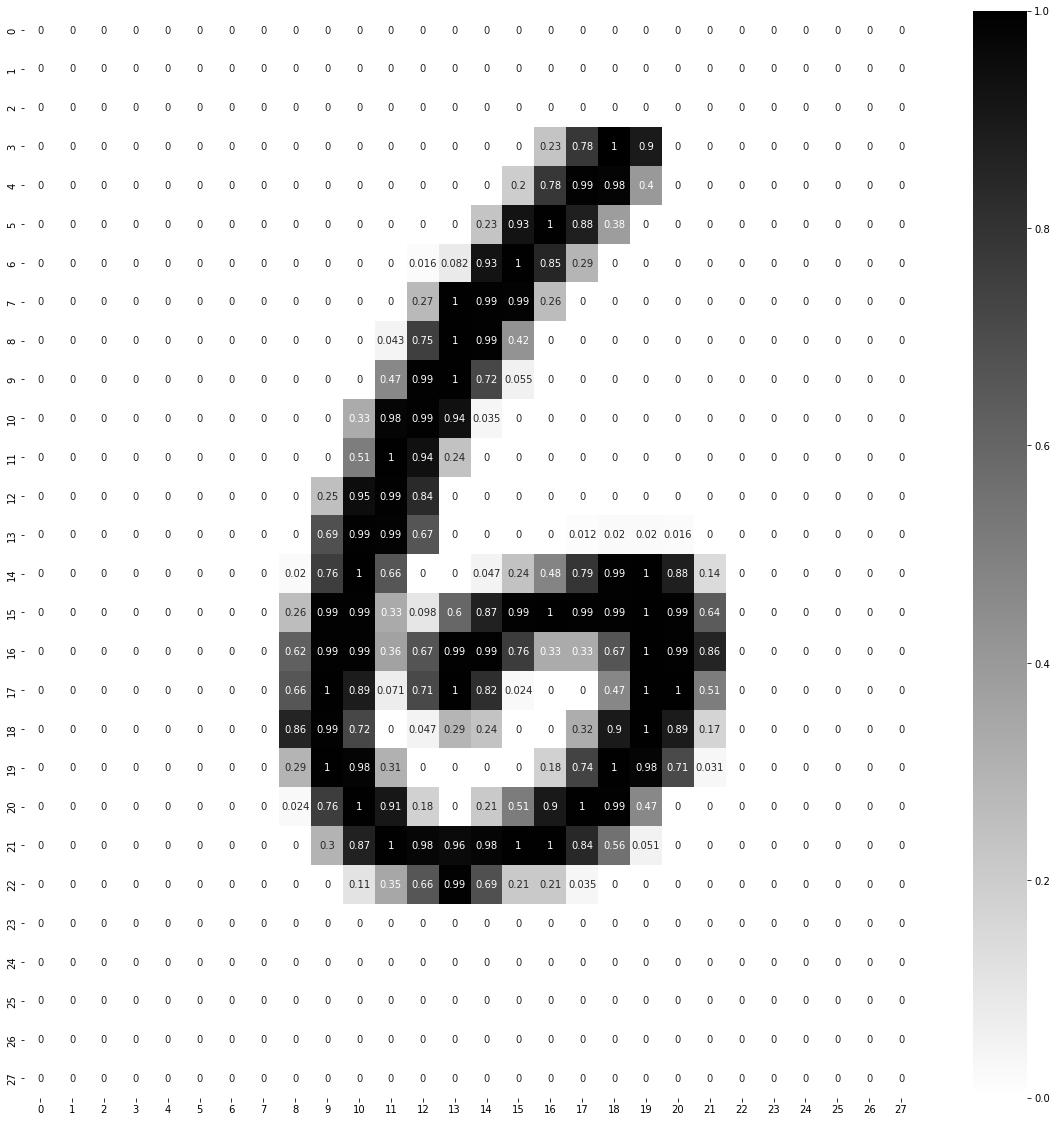

In [13]:
plt.figure(figsize=(20,20))
sns.heatmap(X_train[1000],annot=True,cmap='binary')

In [14]:
LAYERS=[tf.keras.layers.Flatten(input_shape=[28,28],name="inputlayer"),
        tf.keras.layers.Dense(300,activation='relu',name="hiddenlayer1"),
        tf.keras.layers.Dense(100,activation='relu',name="hiddenlayer2"),
        tf.keras.layers.Dense(10,activation='softmax',name='outputlayer')]

In [15]:
model_cf = tf.keras.models.Sequential(LAYERS)

In [16]:
model_cf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [17]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "ADAM"
METRICS = ["accuracy"]

In [18]:
model_cf.compile(loss=LOSS_FUNCTION,optimizer=OPTIMIZER,metrics=METRICS)

In [19]:
model_cf.layers[1].name

'hiddenlayer1'

In [20]:
hidden1 = model_cf.layers[1]

In [21]:
weights,biases = hidden1.get_weights()

In [22]:
55000/32

1718.75

In [24]:
EPOCHS = 5
VALIDATION_SET = (X_valid,y_valid)
history = model_cf.fit(X_train,y_train,epochs=EPOCHS,validation_data=VALIDATION_SET)

Epoch 1/5
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0285 - accuracy: 0.9906 - val_loss: 0.0722 - val_accuracy: 0.9822
Epoch 2/5
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0240 - accuracy: 0.9919 - val_loss: 0.0880 - val_accuracy: 0.9774
Epoch 3/5
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0216 - accuracy: 0.9928 - val_loss: 0.0807 - val_accuracy: 0.9812
Epoch 4/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0161 - accuracy: 0.9947 - val_loss: 0.0890 - val_accuracy: 0.9808
Epoch 5/5
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0155 - accuracy: 0.9947 - val_loss: 0.0902 - val_accuracy: 0.9806


In [25]:
import time
import os
def saveModel_path(model_dir = "/content/SAVED_MODELS/"):
  os.makedirs(model_dir,exist_ok=True)
  fileName = time.strftime("Model_%Y_%m_%d _%H_%M_%S_.h5")
  model_path = os.path.join(model_dir,fileName)
  print(f"your model will be saved at the following location\n{model_path}")
  return model_path

In [26]:
model_cf.save(saveModel_path())

your model will be saved at the following location
/content/SAVED_MODELS/Model_2023_03_11 _12_22_21_.h5


In [27]:
history.params

{'verbose': 1, 'epochs': 5, 'steps': 1719}

In [28]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.028464,0.990618,0.072227,0.9822
1,0.024028,0.991945,0.088027,0.9774
2,0.021585,0.992782,0.080657,0.9812
3,0.016114,0.994745,0.088963,0.9808
4,0.015537,0.994745,0.090174,0.9806


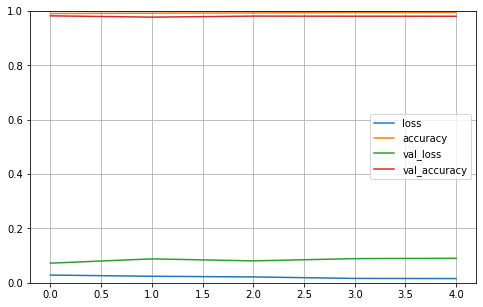

In [30]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [31]:
model_cf.evaluate(X_test,y_test)[1]

313/313 [==============================] - 1s 3ms/step - loss: 0.0921 - accuracy: 0.9801


0.9800999760627747

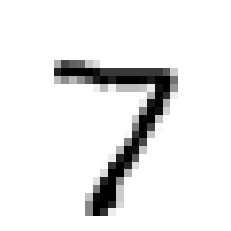

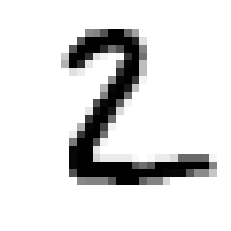

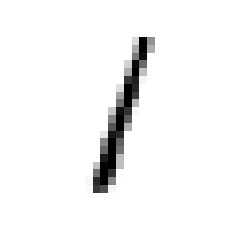

In [32]:
for i in range(0,3):
  #print(i)
  plt.imshow(X_test[i],cmap="binary")
  plt.axis("off")
  plt.show()

In [33]:
prediction = model_cf.predict(X_test[:3])

1/1 [==============================] - 0s 77ms/step


In [34]:
prediction

array([[5.8767997e-13, 1.1137162e-11, 6.5721704e-09, 6.6897672e-12,
        1.3304881e-14, 2.5583306e-13, 9.5059172e-16, 1.0000000e+00,
        1.2011543e-11, 2.7432087e-08],
       [1.9231501e-16, 2.7485573e-11, 1.0000000e+00, 8.1149457e-16,
        5.7799018e-23, 4.5397679e-20, 6.5159428e-16, 8.4628650e-17,
        1.6089604e-14, 1.2479976e-19],
       [1.8882378e-12, 9.9999940e-01, 1.0583627e-09, 6.1987172e-11,
        1.9843813e-07, 3.1173835e-09, 9.3706209e-10, 4.3104285e-07,
        5.2192908e-09, 1.7959517e-10]], dtype=float32)

In [35]:
y_prob = prediction[0]

In [36]:
np.argmax(y_prob.round(5))

7

In [37]:
y_prob= prediction[1]
np.argmax(y_prob)

2